In [123]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

DB_FILE_PATH = 'db.sqlite3'
SELECT_SQL = 'SELECT * FROM blog_accesslog'
ANALYTICS_IMAGE_FILE_PATH = 'static/accessAnalytics/images/'

def create_connection(db_file_path):
    conn = None
    try:
        conn = sqlite3.connect(db_file_path)
    except sqlite3.Error as e:
        print(e)
    return conn

In [124]:
conn = create_connection(DB_FILE_PATH)
df = pd.read_sql_query(SELECT_SQL, conn)
conn.close()
df.head()

,id,blog_pk,blog_name,blog_owner,blog_url,uuId,ip,page,user,timezone,language,device,now,referer,browser
0,1,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:04,http://192.168.33.13:8000/mypage/,Firefox
1,2,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:23,http://192.168.33.13:8000/mypage/edit_contents...,Firefox
2,3,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:39,http://192.168.33.13:8000/mypage/edit_contents...,Firefox
3,4,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:27:45,http://192.168.33.13:8000/mypage/edit_contents...,Firefox
4,5,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/entry/6ae98335-2e21-43...,test1,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:29:38,http://192.168.33.13:8000/,Firefox


In [125]:
# ブログタイトルで絞る

blog_all = df.groupby('blog_name')
blog_all.groups

{"test's blog": Int64Index([  0,   1,   2,   3,   4,   5,   6,  15,  16,  17,
             ...
             191, 192, 193, 194, 195, 199, 200, 201, 202, 203],
            dtype='int64', length=151),
 "test1's blog": Int64Index([  7,   8,   9,  10,  11,  12,  13,  14,  38,  39,  47,  48,  49,
              57,  58,  80,  81, 128, 134, 135, 178, 182, 184, 186, 188, 196,
             197],
            dtype='int64'),
 "test2's blog": Int64Index([69, 70, 71, 72, 73, 92, 127, 170, 171, 179, 185], dtype='int64'),
 "test3's blog": Int64Index([50, 51, 53, 55, 77, 78, 79, 84, 85, 90, 169, 189, 190, 198], dtype='int64'),
 "test4's blog": Int64Index([52], dtype='int64')}

In [126]:
# ブログ毎のアクセスログの数

for k, v in blog_all:
    print(k + ' : ' + str(len(v)))

test's blog : 151
test1's blog : 27
test2's blog : 11
test3's blog : 14
test4's blog : 1


In [127]:
# ブログ毎のアクセスログをuuid,nowだけ摘出し、seriesとしてリストに格納

blog_group_list = []
for k,v in blog_all:
    df_blog_group = pd.concat([v.uuId, v.now], axis=1)
    blog_group_list.append(df_blog_group)

In [128]:
# 列名をnowからtimeに変更し、日時計算のためにdatetime型に変換

cnt = 0

for i in blog_group_list:
    blog_group_list[cnt] = i.rename(columns={'now': 'time'})
    blog_group_list[cnt]['time'] = pd.to_datetime(blog_group_list[cnt]['time'])
    cnt += 1

In [129]:
# uuid毎に絞る

blog_group_uuid_list = []
for i in blog_group_list:
    i = i.groupby('uuId')
    blog_group_uuid_list.append(i)

In [130]:
blog_group_uuid_list[0].groups

{'0661fccec94248d1b595db24423c39ec': Int64Index([91, 93, 94, 95, 96, 97], dtype='int64'),
 '12395bf8ba904292a9b84a9b34cb126c': Int64Index([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
             123, 124, 125, 126, 129, 130, 131, 132, 133, 136, 137, 138, 139,
             140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
             153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
             166, 167, 168, 172, 173, 174, 175, 176, 177, 180, 181],
            dtype='int64'),
 '13e05949b05e49b48b772c67a2729150': Int64Index([194, 195], dtype='int64'),
 '221e90155f714da7bcbb343db700a927': Int64Index([98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], dtype='int64'),
 '25e464113b954e779d205c74b508928a': Int64Index([183, 187, 191, 192, 193], dtype='int64'),
 'b13fcc7505a8419e93a05cd2ff7eac0f': Int64Index([ 0,  1,  2,  3,  4,  5,  6, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
             25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

In [131]:
# ブログ毎、UUID毎にユーザーの滞在時間を計算し、リストに格納

blog_group_uuid_time_list = []

for i in blog_group_uuid_list:
    for k, v in i:
        s = (v['time'].shift(-1) - v['time']).dt.total_seconds()
        s = s.where(s < 1800, 1800)
        blog_group_uuid_time_list.append(s)
blog_group_uuid_time_list

[91      10.0
 93       2.0
 94       7.0
 95    1800.0
 96    1800.0
 97    1800.0
 Name: time, dtype: float64, 110       1.0
 111    1800.0
 112     243.0
 113     235.0
 114      64.0
         ...  
 175     231.0
 176       2.0
 177    1800.0
 180     384.0
 181    1800.0
 Name: time, Length: 63, dtype: float64, 194      37.0
 195    1800.0
 Name: time, dtype: float64, 98        1.0
 99        2.0
 100       2.0
 101       1.0
 102       2.0
 103       4.0
 104       1.0
 105       2.0
 106       1.0
 107       1.0
 108       5.0
 109    1800.0
 Name: time, dtype: float64, 183     887.0
 187     236.0
 191     207.0
 192     276.0
 193    1800.0
 Name: time, dtype: float64, 0       19.0
 1       16.0
 2      126.0
 3      113.0
 4        4.0
 5        6.0
 6       36.0
 15       1.0
 16       2.0
 17       2.0
 18       1.0
 19       1.0
 20       1.0
 21       8.0
 22      28.0
 23       2.0
 24       7.0
 25       2.0
 26       4.0
 27       1.0
 28       9.0
 29       2.0
 30   

In [132]:
blog_group_uuid_time_list[0]

91      10.0
93       2.0
94       7.0
95    1800.0
96    1800.0
97    1800.0
Name: time, dtype: float64

In [133]:
len(blog_group_uuid_time_list)

24

In [134]:
# リストに格納した滞在時間のデータをseriesに変換

blog_group_uuid_time_series = None
for i in range(0, len(blog_group_uuid_time_list)):
    blog_group_uuid_time_series = pd.concat([blog_group_uuid_time_series, blog_group_uuid_time_list[i]])
# df_time1_series = pd.concat([df_time1_list[0], df_time1_list[1]], axis=0)
blog_group_uuid_time_series

91       10.0
93        2.0
94        7.0
95     1800.0
96     1800.0
        ...  
79     1800.0
84        2.0
85     1800.0
198    1800.0
52     1800.0
Name: time, Length: 204, dtype: float64

In [135]:
blog_group_uuid_time_series

91       10.0
93        2.0
94        7.0
95     1800.0
96     1800.0
        ...  
79     1800.0
84        2.0
85     1800.0
198    1800.0
52     1800.0
Name: time, Length: 204, dtype: float64

In [136]:
blog_group_uuid_time_series.size

204

In [137]:
# 元のデータフレームに滞在時間を結合する

df_time = pd.concat([df, blog_group_uuid_time_series], axis=1, join='outer')
df_time['time'] = df_time['time'].fillna(0)
df_time['time'] = df_time['time'].astype(np.int64)
df_time

,id,blog_pk,blog_name,blog_owner,blog_url,uuId,ip,page,user,timezone,language,device,now,referer,browser,time
0,1,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:04,http://192.168.33.13:8000/mypage/,Firefox,19
1,2,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:23,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,16
2,3,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:25:39,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,126
3,4,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:27:45,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,113
4,5,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/entry/6ae98335-2e21-43...,test1,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14 22:29:38,http://192.168.33.13:8000/,Firefox,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27 21:03:17,http://192.168.33.13:8000/mypage/access_analyt...,Firefox,2
200,201,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27 21:03:19,http://192.168.33.13:8000/test/,Firefox,3
201,202,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27 21:03:22,http://192.168.33.13:8000/test/,Firefox,10
202,203,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27 21:03:32,http://192.168.33.13:8000/,Firefox,49


In [138]:
# 日時毎のアクセス数を求めるため、判別しやすいように年-月-日という形式の文字列に変換

df_time_day = df_time
df_time_day['now'] = df_time_day['now'].str[:10]
df_time_day 

,id,blog_pk,blog_name,blog_owner,blog_url,uuId,ip,page,user,timezone,language,device,now,referer,browser,time
0,1,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14,http://192.168.33.13:8000/mypage/,Firefox,19
1,2,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,16
2,3,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,126
3,4,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14,http://192.168.33.13:8000/mypage/edit_contents...,Firefox,113
4,5,1,test's blog,test,test,b13fcc7505a8419e93a05cd2ff7eac0f,192.168.33.1,192.168.33.13:8000/test/entry/6ae98335-2e21-43...,test1,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-14,http://192.168.33.13:8000/,Firefox,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27,http://192.168.33.13:8000/mypage/access_analyt...,Firefox,2
200,201,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27,http://192.168.33.13:8000/test/,Firefox,3
201,202,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27,http://192.168.33.13:8000/test/,Firefox,10
202,203,1,test's blog,test,test,d222cdc31a3346f3a8812f17a838fc49,192.168.33.1,192.168.33.13:8000/test/entry/c433b773-a491-4c...,test,Asia/Tokyo,ja_JP.UTF-8,Macintosh,2020-02-27,http://192.168.33.13:8000/,Firefox,49


In [139]:
# ブログ毎に1週間の間の1日のユーザー数を求めるため、グループ分け

df_user = df_time_day.groupby(['blog_name', 'now', 'uuId'], as_index=False)
df_user.groups

{("test's blog",
  '2020-02-14',
  'b13fcc7505a8419e93a05cd2ff7eac0f'): Int64Index([ 0,  1,  2,  3,  4,  5,  6, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
             25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43,
             44, 45, 46, 54, 56, 59, 60, 61],
            dtype='int64'),
 ("test's blog",
  '2020-02-15',
  'b13fcc7505a8419e93a05cd2ff7eac0f'): Int64Index([62, 63, 64, 65, 66, 67, 68, 74, 75, 76], dtype='int64'),
 ("test's blog",
  '2020-02-19',
  'b5c9b3e5ae1c40d0a7368b40ab8a1b2d'): Int64Index([82, 83, 86], dtype='int64'),
 ("test's blog",
  '2020-02-20',
  'b5c9b3e5ae1c40d0a7368b40ab8a1b2d'): Int64Index([87, 88], dtype='int64'),
 ("test's blog",
  '2020-02-22',
  '0661fccec94248d1b595db24423c39ec'): Int64Index([91, 93, 94, 95, 96, 97], dtype='int64'),
 ("test's blog",
  '2020-02-22',
  'b5c9b3e5ae1c40d0a7368b40ab8a1b2d'): Int64Index([89], dtype='int64'),
 ("test's blog",
  '2020-02-23',
  '12395bf8ba904292a9b84a9b34cb126c'): Int64Index([110, 111, 112, 1

In [140]:
df_user_all = df_time_day.groupby(['blog_name', 'now'], as_index=False)
df_user_all.groups

{("test's blog",
  '2020-02-14'): Int64Index([ 0,  1,  2,  3,  4,  5,  6, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
             25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43,
             44, 45, 46, 54, 56, 59, 60, 61],
            dtype='int64'),
 ("test's blog",
  '2020-02-15'): Int64Index([62, 63, 64, 65, 66, 67, 68, 74, 75, 76], dtype='int64'),
 ("test's blog", '2020-02-19'): Int64Index([82, 83, 86], dtype='int64'),
 ("test's blog", '2020-02-20'): Int64Index([87, 88], dtype='int64'),
 ("test's blog",
  '2020-02-22'): Int64Index([89, 91, 93, 94, 95, 96, 97], dtype='int64'),
 ("test's blog",
  '2020-02-23'): Int64Index([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
             111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
             124, 125, 126, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140,
             141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
             154, 155, 156, 157, 158, 159, 160, 16

In [141]:
# 今日から1週間分の空データを作成するためリストで1週間分の日時を保持

from datetime import datetime, timedelta

# today_str = '2020-02-19'
# today = datetime.strptime(today_str, '%Y-%m-%d')
today = datetime.today()

# テスト用で日付固定
# today_str = "2020-02-07"
# today = datetime.strptime(today_str, '%Y-%m-%d')

cnt = 6
week = []
for i in range(7):
    week.append((today - timedelta(days=cnt)).strftime('%Y-%m-%d'))
    cnt -= 1

week


# cnt = 3
# week = []
# for i in range(4):
#     week.append((today - timedelta(days=cnt)).strftime('%Y-%m-%d'))
#     cnt -= 1

# week

['2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27']

In [142]:
# ブログ毎の1週間のユーザー数
# 1週間分データに修正したバージョン

from collections import defaultdict
nested_dict = lambda: defaultdict(nested_dict)
days = nested_dict()

for k, v in df_user:
    if k[1] in week:
        if k[0] not in days:
            days[k[0]][k[1]] = 1
        if k[0] in days:
            if k[1] in days[k[0]]:
                days[k[0]][k[1]] += 1
            if k[1] not in days[k[0]]:
                days[k[0]][k[1]] = 1
    for day in week:
        if day not in days[k[0]]:
            days[k[0]][day] = 0
days

defaultdict(<function __main__.<lambda>()>,
            {"test's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 2,
                          '2020-02-23': 2,
                          '2020-02-24': 1,
                          '2020-02-25': 1,
                          '2020-02-26': 0,
                          '2020-02-27': 3}),
             "test1's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 0,
                          '2020-02-23': 1,
                          '2020-02-24': 0,
                          '2020-02-25': 1,
                          '2020-02-26': 0,
                          '2020-02-27': 2}),
             "test2's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 1,
                          '2020-02-23': 1,
   

In [143]:
# ブログ毎の1週間のアクセス数
# 1週間分のデータに修正したバージョン

from collections import defaultdict
nested_dict2 = lambda: defaultdict(nested_dict2)
days_all = nested_dict2()

for k, v in df_user_all:
    if k[1] in week:
        days_all[k[0]][k[1]] = len(v)
    for day in week:
        if day not in days_all[k[0]]:
            days_all[k[0]][day] = 0

days_all

defaultdict(<function __main__.<lambda>()>,
            {"test's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 7,
                          '2020-02-23': 67,
                          '2020-02-24': 1,
                          '2020-02-25': 7,
                          '2020-02-26': 0,
                          '2020-02-27': 12}),
             "test1's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 0,
                          '2020-02-23': 3,
                          '2020-02-24': 0,
                          '2020-02-25': 1,
                          '2020-02-26': 0,
                          '2020-02-27': 6}),
             "test2's blog": defaultdict(<function __main__.<lambda>()>,
                         {'2020-02-21': 0,
                          '2020-02-22': 1,
                          '2020-02-23': 1,
 

In [144]:
# 念のためユーザー数をソートする...
blog_week_access_user_dict = {}
for k, v in days.items():
#     py_dict = dict(sorted(v.items()))
#     blog_week_access_user_dict.update({k:py_dict})
    access_user_series = pd.Series(dict(sorted(v.items())))
    blog_week_access_user_dict.update({k:access_user_series})

blog_week_access_user_dict

{"test's blog": 2020-02-21    0
 2020-02-22    2
 2020-02-23    2
 2020-02-24    1
 2020-02-25    1
 2020-02-26    0
 2020-02-27    3
 dtype: int64, "test1's blog": 2020-02-21    0
 2020-02-22    0
 2020-02-23    1
 2020-02-24    0
 2020-02-25    1
 2020-02-26    0
 2020-02-27    2
 dtype: int64, "test2's blog": 2020-02-21    0
 2020-02-22    1
 2020-02-23    1
 2020-02-24    1
 2020-02-25    1
 2020-02-26    0
 2020-02-27    1
 dtype: int64, "test3's blog": 2020-02-21    0
 2020-02-22    1
 2020-02-23    0
 2020-02-24    1
 2020-02-25    0
 2020-02-26    0
 2020-02-27    2
 dtype: int64, "test4's blog": 2020-02-21    0
 2020-02-22    0
 2020-02-23    0
 2020-02-24    0
 2020-02-25    0
 2020-02-26    0
 2020-02-27    0
 dtype: int64}

In [145]:
# 念のためアクセス数をソートする...
blog_week_access_all_dict = {}
for k, v in days_all.items():
#     py_dict = dict(sorted(v.items()))
#     blog_week_access_all_dict.update({k:py_dict})
    access_all_series = pd.Series(dict(sorted(v.items())))
    blog_week_access_all_dict.update({k:access_all_series})

blog_week_access_all_dict

{"test's blog": 2020-02-21     0
 2020-02-22     7
 2020-02-23    67
 2020-02-24     1
 2020-02-25     7
 2020-02-26     0
 2020-02-27    12
 dtype: int64, "test1's blog": 2020-02-21    0
 2020-02-22    0
 2020-02-23    3
 2020-02-24    0
 2020-02-25    1
 2020-02-26    0
 2020-02-27    6
 dtype: int64, "test2's blog": 2020-02-21    0
 2020-02-22    1
 2020-02-23    1
 2020-02-24    2
 2020-02-25    1
 2020-02-26    0
 2020-02-27    1
 dtype: int64, "test3's blog": 2020-02-21    0
 2020-02-22    1
 2020-02-23    0
 2020-02-24    1
 2020-02-25    0
 2020-02-26    0
 2020-02-27    3
 dtype: int64, "test4's blog": 2020-02-21    0
 2020-02-22    0
 2020-02-23    0
 2020-02-24    0
 2020-02-25    0
 2020-02-26    0
 2020-02-27    0
 dtype: int64}

In [146]:
df_access_dict = {}
for k, v in blog_week_access_user_dict.items():
    target_access_series = blog_week_access_all_dict[k]
    res = pd.concat([v, target_access_series], axis=1)
    res.columns = ['User','PV']
    df_access_dict[k] = res

In [147]:
# type(df_access_dict["test's blog"].index[1])

In [148]:
# df_access_dict["test4's blog"]['User'].max()

In [149]:
# df_access_dict["test4's blog"]['PV'].max()

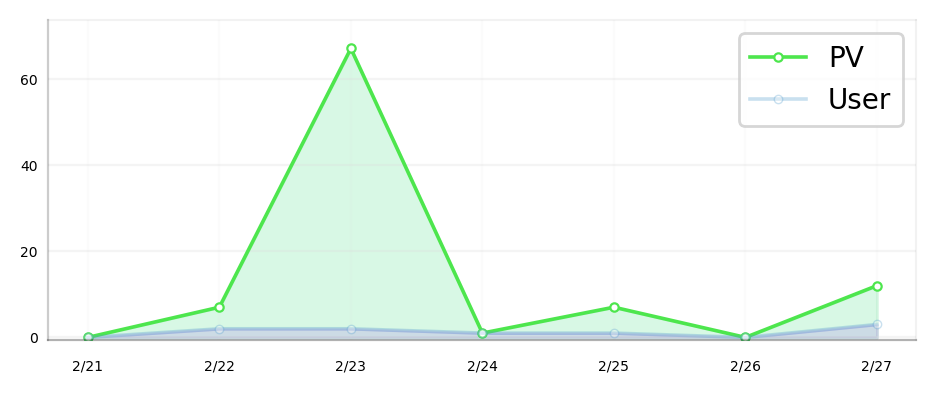

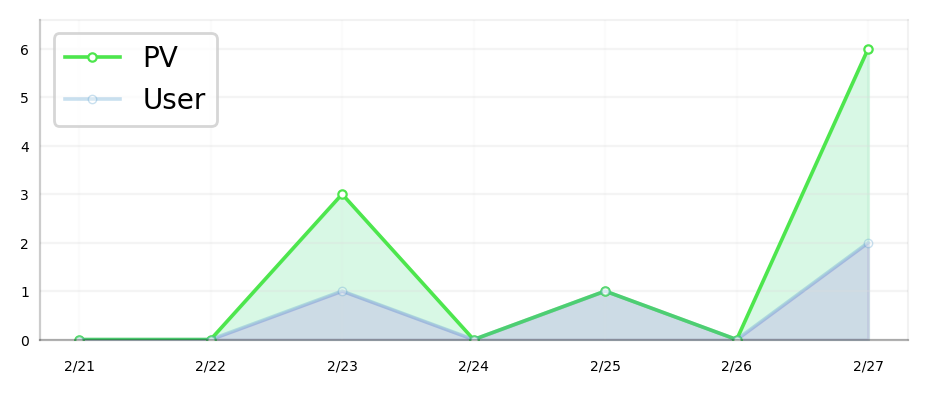

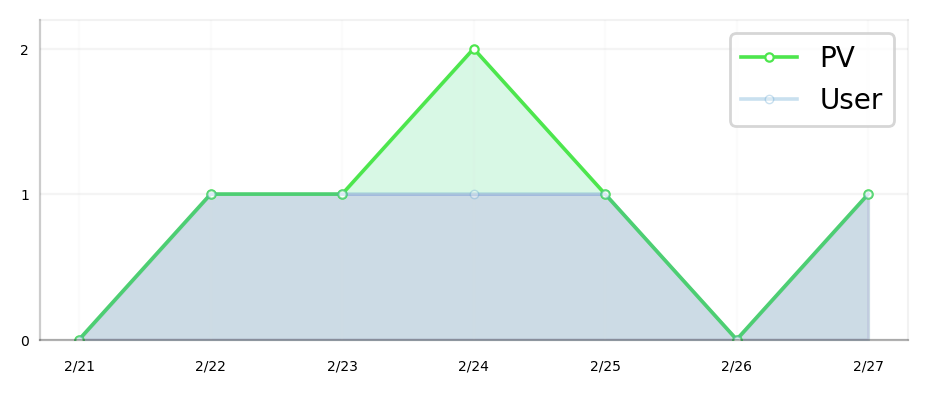

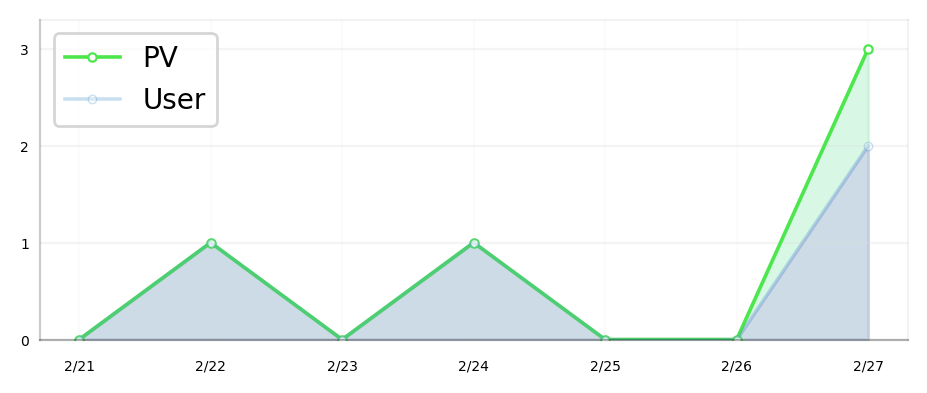

In [153]:
# PV,Userの折れ線グラフ画像出力
# PV,Userの折れ線グラフ画像出力
# PV,Userの折れ線グラフ画像出力
# PV,Userの折れ線グラフ画像出力
# PV,Userの折れ線グラフ画像出力
# PV,Userの折れ線グラフ画像出力

for k, v in df_access_dict.items():
    if df_access_dict[k]['PV'].max() != 0 and df_access_dict[k]['User'].max() != 0:
        fig = plt.figure(figsize=(5.6, 4.4), dpi=200)
        ax = fig.add_subplot(2,1,1)
        plt.fill_between(df_access_dict[k]['PV'].index, df_access_dict[k]['PV'].values, color=[0.7, 0.95, 0.8], alpha=0.5)
        plt.fill_between(df_access_dict[k]['User'].index, df_access_dict[k]['User'].values, color=[0.7, 0.6, 0.9], alpha=0.3)
        pv_max = df_access_dict[k]['PV'].max()*1.1
        user_max = df_access_dict[k]['User'].max()*1.1
        pv_y_max = int(df_access_dict[k]['PV'].max()/4)
        user_y_max = int(df_access_dict[k]['User'].max()/4)

        res1 = user_max if user_max > pv_max else pv_max
        y_min = -0.5 if res1 > 40 else 0
        plt.ylim(y_min, res1)
        plt.xlim()

        y_max = user_y_max if user_y_max > pv_y_max else pv_y_max
        if res1 > 20:
            while y_max % 10 != 0:
                y_max += 1
            plt.yticks(np.arange(0, res1, y_max), x=0.01)
        elif res1 > 10:
            plt.yticks(np.arange(0, res1, 2), x=0.01)
        else:
            plt.yticks(np.arange(0, res1, 1), x=0.01)

        ax.plot(
            df_access_dict[k]['PV'],
            label='PV', 
            color=[0.3, 0.9, 0.3],
            linestyle='solid',
            linewidth=1.3,
            marker='o',
            markersize=3,
            markerfacecolor=[1.0, 1.0, 1.0],
            markeredgewidth=0.8,
            solid_joinstyle='bevel',
        )
        ax.plot(
            df_access_dict[k]['User'],
            label='User',
            color=[0.3, 0.6, 0.8],
            linestyle='solid',
            linewidth=1.3,
            alpha=0.3,
            marker='o',
            markersize=3,
            markerfacecolor=[1.0, 1.0, 1.0],
            markeredgewidth=0.5,
        )

        ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
        ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)

        ax.legend(bbox_to_anchor=(1,1), loc='upper right', borderaxespad=1.3, fontsize=6)

        plt.gca().spines['top'].set_alpha(0.05)
        plt.gca().spines['right'].set_alpha(0.05)
        plt.gca().spines['left'].set_alpha(0.2)
        plt.gca().spines['bottom'].set_alpha(0.3)

        y_labels = ax.get_yticklabels()
        x_labels = ax.get_xticklabels()
        plt.setp(y_labels, rotation=0, fontsize=6)
        plt.setp(x_labels, rotation=0, fontsize=6)

        plt.tick_params(
            left=False,
            bottom=False,
            labelsize=5,
        )
        ax.legend()
        filename = k + '_pv_week'
        plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
        plt.savefig(ANALYTICS_IMAGE_FILE_PATH + filename, bbox_inches="tight", pad_inches=0.0)

IndexError: string index out of range

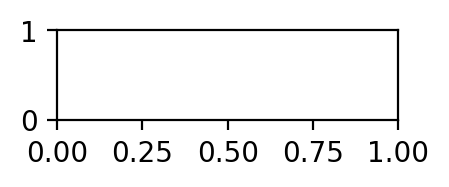

In [154]:
# PVの棒グラフ出力

# PV,Userの折れ線グラフ画像出力

for k, v in df_access_dict.items():
    if df_access_dict[k]['PV'].max() != 0:
        fig = plt.figure(figsize=(2.2, 1.3), dpi=200)
        ax = fig.add_subplot(2,1,1)

        today_pv = df_access_dict[k]['PV']

        ##ylabel書き換え=>1回実行したら再度一番上から実行すること##
        index_list = []
        for i in today_pv.index:
            day_str = i[5:]
            day = day_str[1:].replace('-', '/') if day_str[0] == '0' else day_str.replace('-', '/')
            index_list.append(day)
        today_pv.index = pd.Index(index_list)

        res = 100 if int(today_pv.max()) < 100 else int(today_pv.max()) * 1.5
        plt.xlim(0, res)

        ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
        ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)

        barh_list = ax.barh(today_pv.index, today_pv, color=[0.5, 0.9, 0.5], alpha=0.7, height=0.7)
        y_labels = ax.get_yticklabels()
        x_labels = ax.get_xticklabels()
        plt.setp(y_labels, rotation=0, fontsize=3)
        plt.setp(x_labels, rotation=0, fontsize=3)
        plt.gca().spines['top'].set_alpha(0.05)
        plt.gca().spines['right'].set_alpha(0.05)
        plt.gca().spines['left'].set_alpha(0.2)
        plt.gca().spines['bottom'].set_alpha(0.3)
        plt.tick_params(
            left=False,
            bottom=False,
            labelsize=4,
        )

        filename = k + '_pv_week_bar'
        plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
        plt.savefig(ANALYTICS_IMAGE_FILE_PATH + filename, bbox_inches="tight", pad_inches=0.0)

IndexError: string index out of range

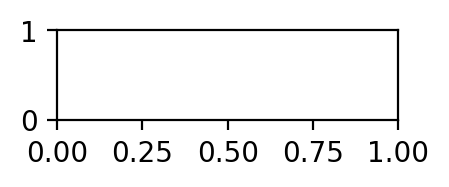

In [155]:
# Userの棒グラフ出力

# PV,Userの折れ線グラフ画像出力

for k, v in df_access_dict.items():
    if df_access_dict[k]['User'].max() != 0:
        fig = plt.figure(figsize=(2.2, 1.3), dpi=200)
        ax = fig.add_subplot(2,1,1)

        today_user = df_access_dict[k]['User']

        ##ylabel書き換え=>1回実行したら再度一番上から実行すること##
        index_list = []
        for i in today_user.index:
            day_str = i[5:]
            day = day_str[1:].replace('-', '/') if day_str[0] == '0' else day_str.replace('-', '/')
            index_list.append(day)
        today_user.index = pd.Index(index_list)

        res = 50 if int(today_user.max()) < 50 else int(today_user.max()) * 1.5
        plt.xlim(0, res)

        ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
        ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)

        barh_list = ax.barh(today_user.index, today_user, color=[0.5, 0.5, 0.9], alpha=0.7, height=0.7)
        y_labels = ax.get_yticklabels()
        x_labels = ax.get_xticklabels()
    #     plt.setp(y_labels, rotation=0, fontsize=3)
        plt.setp(x_labels, rotation=0, fontsize=6)
        plt.gca().spines['top'].set_alpha(0.05)
        plt.gca().spines['right'].set_alpha(0.05)
        plt.gca().spines['left'].set_alpha(0.2)
        plt.gca().spines['bottom'].set_alpha(0.3)
        plt.tick_params(
            left=False,
            bottom=False,
            labelsize=4,
        )

        filename = k + '_user_week_bar'
        plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
        plt.savefig(ANALYTICS_IMAGE_FILE_PATH + filename, bbox_inches="tight", pad_inches=0.0)

In [156]:
# AccessAnalyticsに書き込み用

# def insertAnalyticsData(conn, values):
#     sql = ''' INSERT INTO blog_accessanalytics(
#         blog_pk,
#         blog_name,
#         blog_owner,
#         blog_url,
#         total_pv,
#         month_pv,
#         week_pv,
#         day_pv,
#         total_user,
#         month_user,
#         week_user,
#         day_user,
#         created_at
#     ) VALUES(
#         null,
#         ?,
#         null,
#         null,
#         null,
#         null,
#         null,
#         ?,
#         null,
#         null,
#         null,
#         ?,
#         ?
#     )'''
#     cur = conn.cursor()
#     cur.execute(sql, values)
#     return cur.lastrowid

def insertAnalyticsData(conn, values):
    sql = ''' INSERT INTO blog_accessanalytics(
        blog_name,
        week_pv,
        day_pv,
        week_user,
        day_user,
        created_at
    ) VALUES(
        ?,
        ?,
        ?,
        ?,
        ?,
        ?
    )'''
    cur = conn.cursor()
    cur.execute(sql, values)
    return cur.lastrowid

In [157]:
conn = create_connection(DB_FILE_PATH)
with conn:
    for k, v in df_access_dict.items():
        if df_access_dict[k]['PV'].max() != 0 and df_access_dict[k]['User'].max() != 0:
            today_pv = int(v.loc[today.strftime('%Y-%m-%d'), 'PV'])
            today_user = int(v.loc[today.strftime('%Y-%m-%d'), 'User'])
            week_pv = int(v.PV.sum())
            week_user = int(v.User.sum())
            now_date = datetime.now()
            values = (k, week_pv, today_pv, week_user, today_user, now_date)
            print(values)
            insertAnalyticsData(conn, values)

("test's blog", 94, 12, 9, 3, datetime.datetime(2020, 2, 27, 12, 43, 45, 680312))
("test1's blog", 10, 6, 4, 2, datetime.datetime(2020, 2, 27, 12, 43, 45, 684503))
("test2's blog", 6, 1, 5, 1, datetime.datetime(2020, 2, 27, 12, 43, 45, 685978))
("test3's blog", 5, 3, 4, 2, datetime.datetime(2020, 2, 27, 12, 43, 45, 686953))


In [31]:
# # デザイン用スペース

# fig = plt.figure(figsize=(6.0, 4.0), dpi=200)
# ax = fig.add_subplot(2,1,1)

# ax.plot(
#     df_access_dict["test's blog"]['PV'],
#     label='PV', 
#     color=[0.3, 0.9, 0.3],
#     linestyle='solid',
#     linewidth=1.3,
#     marker='o',
#     markersize=3,
#     markerfacecolor=[1.0, 1.0, 1.0],
#     markeredgewidth=0.8,
#     solid_joinstyle='bevel',
# )
# ax.plot(
#     df_access_dict["test's blog"]['User'],
#     label='User',
#     color=[0.3, 0.4, 0.8],
#     linestyle='solid',
#     linewidth=1.3,
#     alpha=0.3,
#     marker='o',
#     markersize=3,
#     markerfacecolor=[1.0, 1.0, 1.0],
#     markeredgewidth=0.5,
# )
# ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
# ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)
# # ax.legend(bbox_to_anchor=(0,1), loc='upper left', borderaxespad=1.2, fontsize=6)
# ax.legend(bbox_to_anchor=(1,1), loc='upper right', borderaxespad=1.3, fontsize=6)

# plt.fill_between(df_access_dict["test's blog"]['PV'].index, df_access_dict["test's blog"]['PV'].values, color=[0.7, 0.95, 0.8], alpha=0.5)
# plt.fill_between(df_access_dict["test's blog"]['User'].index, df_access_dict["test's blog"]['User'].values, color=[0.7, 0.6, 0.9], alpha=0.3)
# plt.ylim(0, df_access_dict["test's blog"]['PV'].max()*1.1)
# plt.xlim()
# pv_max = df_access_dict["test's blog"]['PV'].max()*1.1
# y_max = int(df_access_dict["test's blog"]['PV'].max()/4)
# while y_max % 10 != 0:
#     y_max += 1
# plt.yticks(np.arange(0, pv_max, y_max), x=0.01)
# # plt.gca().spines['top'].set_visible(False)
# # plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_alpha(0.05)
# plt.gca().spines['right'].set_alpha(0.05)
# plt.gca().spines['left'].set_alpha(0.2)
# plt.gca().spines['bottom'].set_alpha(0.3)

# y_labels = ax.get_yticklabels()
# x_labels = ax.get_xticklabels()
# plt.setp(y_labels, rotation=0, fontsize=6)
# plt.setp(x_labels, rotation=0, fontsize=6)
# plt.tick_params(
#     left=False,
#     bottom=False,
#     labelsize=5,
# )

# # filename = k + '_week_' + today.strftime('%Y%m%d')
# plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

In [32]:
# # デザイン用スペース

# fig = plt.figure(figsize=(8.0, 8.0), dpi=200)
# today_pv = df_access_dict["test's blog"]['PV']
# ax = fig.add_subplot(2,1,1)

# ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
# ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)
# # barh_list = ax.barh(today_pv.index, today_pv, color=[0.3,0.6,0.9], alpha=0.7, height=0.7)
# barh_list = ax.barh(today_pv.index, today_pv, color=[0.5, 0.9, 0.5], alpha=0.7, height=0.7)
# y_labels = ax.get_yticklabels()
# x_labels = ax.get_xticklabels()
# plt.setp(y_labels, rotation=45, fontsize=6)
# plt.setp(x_labels, rotation=0, fontsize=6)
# plt.gca().spines['top'].set_alpha(0.05)
# plt.gca().spines['right'].set_alpha(0.05)
# plt.gca().spines['left'].set_alpha(0.2)
# plt.gca().spines['bottom'].set_alpha(0.3)
# plt.tick_params(
#     left=False,
#     bottom=False,
#     labelsize=7,
# )


# # barh_list[6].set_color('')

In [33]:
# # デザイン用スペース

# fig = plt.figure(figsize=(8.0, 8.0), dpi=200)
# today_pv = df_access_dict["test's blog"]['User']
# ax = fig.add_subplot(2,1,1)

# ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
# ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)
# # barh_list = ax.barh(today_pv.index, today_pv, color=[0.3,0.6,0.9], alpha=0.7, height=0.7)
# barh_list = ax.barh(today_pv.index, today_pv, color=[0.5, 0.6, 0.9], alpha=0.7, height=0.7)
# y_labels = ax.get_yticklabels()
# x_labels = ax.get_xticklabels()
# plt.setp(y_labels, rotation=45, fontsize=6)
# plt.setp(x_labels, rotation=0, fontsize=6)
# plt.gca().spines['top'].set_alpha(0.05)
# plt.gca().spines['right'].set_alpha(0.05)
# plt.gca().spines['left'].set_alpha(0.2)
# plt.gca().spines['bottom'].set_alpha(0.3)
# plt.tick_params(
#     left=False,
#     bottom=False,
#     labelsize=7,
# )
# # barh_list[6].set_color('')

In [158]:
# # アクセスないユーザー用

# fig = plt.figure(figsize=(6.0, 4.0), dpi=200)
# ax = fig.add_subplot(2,1,1)

# ax.plot(
#     df_access_dict["test's blog"]['PV'],
#     label='PV', 
#     color=[0.3, 0.9, 0.3],
#     linestyle='solid',
#     linewidth=1.3,
#     marker='o',
#     markersize=3,
#     markerfacecolor=[1.0, 1.0, 1.0],
#     markeredgewidth=0.8,
#     solid_joinstyle='bevel',
# )
# ax.plot(
#     df_access_dict["test's blog"]['User'],
#     label='User',
#     color=[0.3, 0.4, 0.8],
#     linestyle='solid',
#     linewidth=1.3,
#     alpha=0.3,
#     marker='o',
#     markersize=3,
#     markerfacecolor=[1.0, 1.0, 1.0],
#     markeredgewidth=0.5,
# )
# ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
# ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)
# # ax.legend(bbox_to_anchor=(0,1), loc='upper left', borderaxespad=1.2, fontsize=6)
# ax.legend(bbox_to_anchor=(1,1), loc='upper right', borderaxespad=1.3, fontsize=6)

# plt.fill_between(df_access_dict["test's blog"]['PV'].index, df_access_dict["test's blog"]['PV'].values, color=[0.7, 0.95, 0.8], alpha=0.5)
# plt.fill_between(df_access_dict["test's blog"]['User'].index, df_access_dict["test's blog"]['User'].values, color=[0.7, 0.6, 0.9], alpha=0.3)
# plt.ylim(-0.8, df_access_dict["test's blog"]['PV'].max()*1.1)
# plt.xlim()
# pv_max = df_access_dict["test's blog"]['PV'].max()*1.1
# y_max = int(df_access_dict["test's blog"]['PV'].max()/4)
# while y_max % 10 != 0:
#     y_max += 1
# plt.yticks(np.arange(0, pv_max, y_max), x=0.01)
# # plt.gca().spines['top'].set_visible(False)
# # plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_alpha(0.05)
# plt.gca().spines['right'].set_alpha(0.05)
# plt.gca().spines['left'].set_alpha(0.2)
# plt.gca().spines['bottom'].set_alpha(0.3)

# y_labels = ax.get_yticklabels()
# x_labels = ax.get_xticklabels()
# plt.setp(y_labels, rotation=0, fontsize=6)
# plt.setp(x_labels, rotation=0, fontsize=6)
# plt.tick_params(
#     left=False,
#     bottom=False,
#     labelsize=5,
# )

# # filename = k + '_week_' + today.strftime('%Y%m%d')
# plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

In [159]:
no_access_pv = pd.Series(
    np.zeros(7, dtype=np.int16),
    index=[
        '2/13',
        '2/14',
        '2/15',
        '2/16',
        '2/17',
        '2/18',
        '2/19']
)
no_access_pv

2/13    0
2/14    0
2/15    0
2/16    0
2/17    0
2/18    0
2/19    0
dtype: int16

In [160]:
no_access_user = pd.Series(
    np.zeros(7, dtype=np.int16),
    index=[
        '2/13',
        '2/14',
        '2/15',
        '2/16',
        '2/17',
        '2/18',
        '2/19']
)
no_access_user

2/13    0
2/14    0
2/15    0
2/16    0
2/17    0
2/18    0
2/19    0
dtype: int16

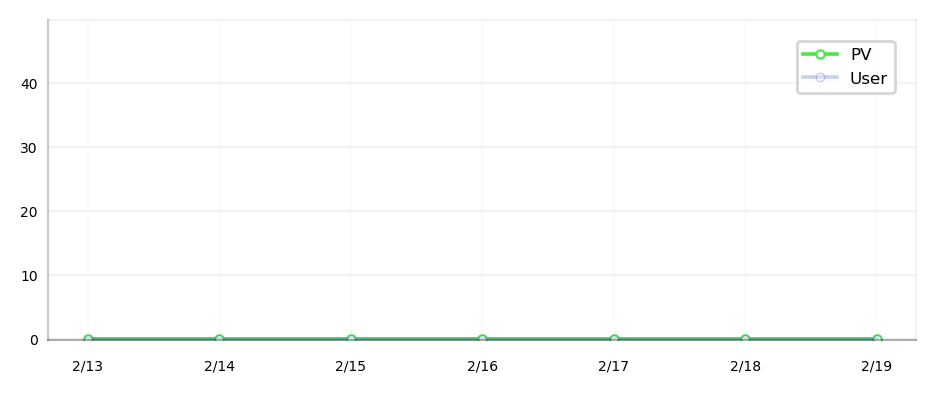

In [161]:
# アクセスないユーザー用

fig = plt.figure(figsize=(5.6, 4.4), dpi=200)
ax = fig.add_subplot(2,1,1)

ax.plot(
    no_access_pv,
    label='PV', 
    color=[0.3, 0.9, 0.3],
    linestyle='solid',
    linewidth=1.3,
    marker='o',
    markersize=3,
    markerfacecolor=[1.0, 1.0, 1.0],
    markeredgewidth=0.8,
    solid_joinstyle='bevel',
)
ax.plot(
    no_access_user,
    label='User',
    color=[0.3, 0.4, 0.8],
    linestyle='solid',
    linewidth=1.3,
    alpha=0.3,
    marker='o',
    markersize=3,
    markerfacecolor=[1.0, 1.0, 1.0],
    markeredgewidth=0.5,
)
ax.grid(axis='y', c='gainsboro', zorder=1, alpha=0.3)
ax.grid(axis='x', c='gainsboro', zorder=1, alpha=0.1)
# ax.legend(bbox_to_anchor=(0,1), loc='upper left', borderaxespad=1.2, fontsize=6)
ax.legend(bbox_to_anchor=(1,1), loc='upper right', borderaxespad=1.3, fontsize=6)

plt.fill_between(no_access_pv.index, no_access_pv.values, color=[0.7, 0.95, 0.8], alpha=0.5)
plt.fill_between(no_access_user.index, no_access_user.values, color=[0.7, 0.6, 0.9], alpha=0.3)
plt.ylim(-0.1, 50)
plt.xlim()
# pv_max = no_access_pv.max()*1.1
# y_max = int(no_access_pv.max()/4)
# while y_max % 10 != 0:
#     y_max += 1
plt.yticks(np.arange(0, 50, 10), x=0.01)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_alpha(0.05)
plt.gca().spines['right'].set_alpha(0.05)
plt.gca().spines['left'].set_alpha(0.2)
plt.gca().spines['bottom'].set_alpha(0.3)

y_labels = ax.get_yticklabels()
x_labels = ax.get_xticklabels()
plt.setp(y_labels, rotation=0, fontsize=6)
plt.setp(x_labels, rotation=0, fontsize=6)
plt.tick_params(
    left=False,
    bottom=False,
    labelsize=5,
)

# filename = k + '_week_' + today.strftime('%Y%m%d')
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
filename = 'no_access_week'
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)
plt.savefig(ANALYTICS_IMAGE_FILE_PATH + filename, bbox_inches="tight", pad_inches=0.0)